# Make the figures for the paper

This notebook generates the figures used in the paper. **No results are calculated here**. We'll only load the results from files produced by other notebook.

## Package imports

In [1]:
# Insert the plots into the notebook
%matplotlib inline

In [2]:
from __future__ import division
import cPickle as pickle
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn  # Makes the default style of the plots nicer

In [3]:
from datasets import fetch_crust1, load_icgem_gdf, down_sample

In [4]:
config = dict(fontsize=7)
plt.rcParams['font.size'] = config['fontsize']
plt.rcParams['axes.labelsize'] = config['fontsize']
plt.rcParams['xtick.labelsize'] = config['fontsize']
plt.rcParams['ytick.labelsize'] = config['fontsize']
plt.rcParams['legend.fontsize'] = config['fontsize']
#plt.rcParams['font.family'] = 'Arial'

In [5]:
def data_minmax(data):
    ranges = np.abs([data.min(), data.max()]).max()
    return dict(vmin=-ranges, vmax=ranges)

## Simple synthetic

This section generates figures for the simple synthetic data application.

Load the model, synthetic data, and the results dictionary.

In [6]:
with open('../model/synthetic-simple.pickle') as f:
    model = pickle.load(f)

In [7]:
with open('../data/synthetic-data-simple.txt') as f:
    for i in range(2):
        f.readline()
    line = f.readline()
    shape = map(int, line.split()[1:])
    lat, lon, height, data = np.loadtxt(f, unpack=True, usecols=[0, 1, 2, 4])

In [8]:
with zipfile.ZipFile('results/synthetic-simple-newton.zip') as f:
    results = pickle.load(f.open('synthetic-simple-newton.pickle'))

In [9]:
results.keys()

['best_index',
 'solution',
 'solutions',
 'scores',
 'regul_params',
 'config',
 'metadata']

In [10]:
print(results['metadata'])

Generated by sinthetic-simple.ipynb on 07 February 2016 00:10:15 UTC


Make the map projection for these plots.

In [11]:
bm = Basemap(projection='cyl', 
             llcrnrlon=model.area[2], urcrnrlon=model.area[3], 
             llcrnrlat=model.area[0], urcrnrlat=model.area[1],
             resolution='c')

Plot the data and model in a figure.

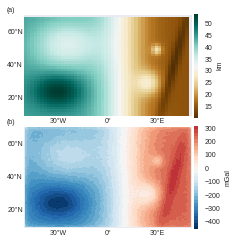

In [16]:
plt.figure(figsize=(3.33, 3.2))

ax = plt.subplot(2, 1, 1)
plt.text(-0.1, 1.03, '(a)', transform=ax.transAxes, **config)
x, y = bm(model.lon.reshape(model.shape), model.lat.reshape(model.shape))
bm.pcolormesh(x, y, -0.001*model.relief.reshape(model.shape), cmap='BrBG')
plt.colorbar(pad=0.01, aspect=30).set_label('km')
bm.drawmeridians([-30, 0 , 30], labels=[0, 0, 0, 1], linewidth=0, **config)
bm.drawparallels([20, 40, 60], labels=[1, 0, 0, 0], linewidth=0, **config)

ax = plt.subplot(2, 1, 2)
plt.text(-0.1, 1.03, '(b)', transform=ax.transAxes, **config)
x, y = bm(lon.reshape(shape), lat.reshape(shape))
bm.contourf(x, y, data.reshape(shape), 30, cmap='RdBu_r', **data_minmax(data))
plt.colorbar(pad=0.01, aspect=30).set_label('mGal')
bm.drawmeridians([-30, 0 , 30], labels=[0, 0, 0, 1], linewidth=0, **config)
bm.drawparallels([20, 40, 60], labels=[1, 0, 0, 0], linewidth=0, **config)

plt.tight_layout()
plt.subplots_adjust(left=0.1)
plt.savefig('../manuscript/figures/synthetic-simple-data.eps')

## Gravity data for South America

In [13]:
seaborn.set_context('paper')
fig_file = '../manuscript/figures/sam-gravity-{}.eps'
fig_args = dict(facecolor='none')

In [5]:
with open('../data/processed-goco5s-data-sam-h50km.txt') as f:
    f.readline()
    shape = tuple(int(i) for i in f.readline().split()[1:])
    data = np.loadtxt(f, unpack=True)
    lat, lon, height, topo, grav, disturbance, topo_effect, bouguer = data[:8]
    upper_sed, middle_set, lower_sed, total_sed, sedfree_bouguer = data[8:]
    area = (lat.min(), lat.max(), lon.min(), lon.max())

Setup a [basemap](http://matplotlib.org/basemap/index.html) to plot the data with an appropriate projection.

In [6]:
bm = Basemap(projection='cyl', 
             llcrnrlon=area[2], urcrnrlon=area[3], llcrnrlat=area[0], urcrnrlat=area[1],
             lon_0=0.5*(area[2] + area[3]), lat_0=0.5*(area[1] + area[0]), 
             resolution='l')

In [7]:
x, y = bm(lon, lat) # Transform lat and lon into plot coordinates

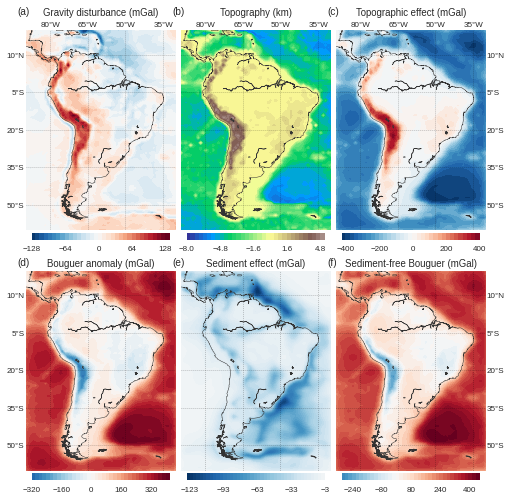

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(7, 7))
axes = axes.ravel()

cbargs = dict(orientation='horizontal', pad=0.01, aspect=20, shrink=0.9)
gridargs = dict(linewidth=0.2, fontsize=8)

ax = axes[0]
ax.text(-0.05, 1.08, '(a)', transform=ax.transAxes)
ax.set_title('Gravity disturbance (mGal)', y=1.05)
ranges = np.abs([disturbance.min(), disturbance.max()]).max()
tmp = bm.contourf(x.reshape(shape), y.reshape(shape), disturbance.reshape(shape), 40, 
                  vmin=-ranges, vmax=ranges, cmap='RdBu_r', ax=ax)
cb = plt.colorbar(tmp, ax=ax, **cbargs)
#cb.set_label('mGal')
plt.setp(cb.ax.get_xticklabels()[1::2], visible=False)
bm.drawmeridians(np.arange(-80, -30, 15), labels=[0, 0, 1, 0], ax=ax, **gridargs)
bm.drawparallels(np.arange(-50, 30, 15), labels=[1, 0, 0, 0], ax=ax, **gridargs)
bm.drawcoastlines(color="#333333", linewidth=0.5, ax=ax)

ax = axes[1]
ax.text(-0.05, 1.08, '(b)', transform=ax.transAxes)
ax.set_title('Topography (km)', y=1.05)
ranges = np.abs([0.001*topo.min(), 0.001*topo.max()]).max()
tmp = bm.contourf(x.reshape(shape), y.reshape(shape), 0.001*topo.reshape(shape), 40, 
                  vmin=-ranges, vmax=ranges, cmap='terrain', ax=ax)
cb = plt.colorbar(tmp, ax=ax, **cbargs)
#cb.set_label('km')
plt.setp(cb.ax.get_xticklabels()[1::2], visible=False)
bm.drawmeridians(np.arange(-80, -30, 15), labels=[0, 0, 1, 0], ax=ax, **gridargs)
bm.drawparallels(np.arange(-50, 30, 15), labels=[0, 0, 0, 0], ax=ax, **gridargs)
bm.drawcoastlines(color="#333333", linewidth=0.5, ax=ax)

ax = axes[2]
ax.text(-0.05, 1.08, '(c)', transform=ax.transAxes)
ax.set_title('Topographic effect (mGal)', y=1.05)
ranges = np.abs([topo_effect.min(), topo_effect.max()]).max()
tmp = bm.contourf(x.reshape(shape), y.reshape(shape), topo_effect.reshape(shape), 40, 
                  vmin=-ranges, vmax=ranges, cmap='RdBu_r', ax=ax)
cb = plt.colorbar(tmp, ax=ax, **cbargs)
#cb.set_label('mGal')
plt.setp(cb.ax.get_xticklabels()[1::2], visible=False)
bm.drawmeridians(np.arange(-80, -30, 15), labels=[0, 0, 1, 0], ax=ax, **gridargs)
bm.drawparallels(np.arange(-50, 30, 15), labels=[0, 1, 0, 0], ax=ax, **gridargs)
bm.drawcoastlines(color="#333333", linewidth=0.5, ax=ax)

ax = axes[3]
ax.text(-0.05, 1.03, '(d)', transform=ax.transAxes)
ax.set_title('Bouguer anomaly (mGal)')
ranges = np.abs([bouguer.min(), bouguer.max()]).max()
tmp = bm.contourf(x.reshape(shape), y.reshape(shape), bouguer.reshape(shape), 40, 
                  vmin=-ranges, vmax=ranges, cmap='RdBu_r', ax=ax)
cb = plt.colorbar(tmp, ax=ax, **cbargs)
#cb.set_label('mGal')
plt.setp(cb.ax.get_xticklabels()[1::2], visible=False)
bm.drawmeridians(np.arange(-80, -30, 15), labels=[0, 0, 0, 0], ax=ax, **gridargs)
bm.drawparallels(np.arange(-50, 30, 15), labels=[1, 0, 0, 0], ax=ax, **gridargs)
bm.drawcoastlines(color="#333333", linewidth=0.5, ax=ax)

ax = axes[4]
ax.text(-0.05, 1.03, '(e)', transform=ax.transAxes)
ax.set_title('Sediment effect (mGal)')
ranges = np.abs([total_sed.min(), total_sed.max()]).max()
tmp = bm.contourf(x.reshape(shape), y.reshape(shape), total_sed.reshape(shape), 40, 
                  vmin=-ranges, vmax=ranges, cmap='RdBu_r', ax=ax)
cb = plt.colorbar(tmp, ax=ax, **cbargs)
#cb.set_label('mGal')
plt.setp(cb.ax.get_xticklabels()[1::2], visible=False)
bm.drawmeridians(np.arange(-80, -30, 15), labels=[0, 0, 0, 0], ax=ax, **gridargs)
bm.drawparallels(np.arange(-50, 30, 15), labels=[0, 0, 0, 0], ax=ax, **gridargs)
bm.drawcoastlines(color="#333333", linewidth=0.5, ax=ax)

ax = axes[5]
ax.text(-0.05, 1.03, '(f)', transform=ax.transAxes)
ax.set_title('Sediment-free Bouguer (mGal)')
ranges = np.abs([sedfree_bouguer.min(), sedfree_bouguer.max()]).max()
tmp = bm.contourf(x.reshape(shape), y.reshape(shape), sedfree_bouguer.reshape(shape), 40, 
                  vmin=-ranges, vmax=ranges, cmap='RdBu_r', ax=ax)
cb = plt.colorbar(tmp, ax=ax, **cbargs)
#cb.set_label('mGal')
plt.setp(cb.ax.get_xticklabels()[1::2], visible=False)
bm.drawmeridians(np.arange(-80, -30, 15), labels=[0, 0, 0, 0], ax=ax, **gridargs)
bm.drawparallels(np.arange(-50, 30, 15), labels=[0, 1, 0, 0], ax=ax, **gridargs)
bm.drawcoastlines(color="#333333", linewidth=0.5, ax=ax)

plt.subplots_adjust(left=0.04, bottom=0.0, right=0.96, top=0.95, wspace=0.01, hspace=0.01)
plt.savefig(fig_file.format('data'), **fig_args)

In [18]:
crust1 = fetch_crust1('../data/crust1.0.tar.gz').cut(area)

In [19]:
layers = [l.contrast('density', 2670) 
          for l in [crust1.upper_sediments, crust1.middle_sediments, crust1.lower_sediments]]
layer_names = ['Upper sediments', 'Middle Sediments', 'Lower sediments']

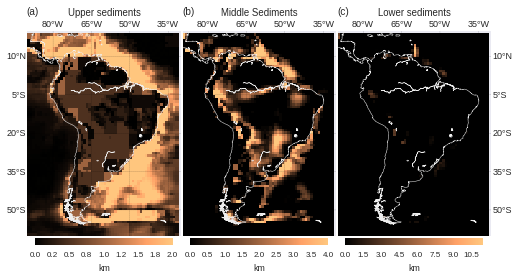

In [20]:
x, y = bm(crust1.lon + 360, crust1.lat) # Transform lat and lon into plot coordinates
fig, axes = plt.subplots(1, 3, figsize=(7, 4))
for i, args in enumerate(zip(layer_names, layers, axes.ravel(), '(a) (b) (c)'.split())):
    layer_name, layer, ax, letter = args
    tmp = bm.pcolormesh(x, y, 0.001*layer.thickness, cmap='copper',  ax=ax)
    cb = plt.colorbar(tmp, ax=ax, pad=0.01, format='%.1f', orientation='horizontal', aspect=20, shrink=0.9)
    cb.set_label('km')
    bm.drawmeridians(np.arange(-80, -30, 15), labels=[0, 0, 1, 0], linewidth=0.2, fontsize=9, ax=ax)
    if i == 0:
        labels = [1, 0, 0, 0]
    elif i == 2:
        labels = [0, 1, 0, 0]
    else:
        labels = [0, 0, 0, 0]
    bm.drawparallels(np.arange(-50, 30, 15), labels=labels, linewidth=0.2, fontsize=9, ax=ax)
    bm.drawcoastlines(color="#eeeeee", linewidth=0.5, ax=ax)    
    ax.set_title(layer_name, y=1.05)
    ax.text(0.0, 1.08, letter, transform=ax.transAxes)
plt.subplots_adjust(left=0.04, bottom=0.0, right=0.96, top=0.95, wspace=0.01, hspace=0.01)
plt.savefig(fig_file.format('sed'), **fig_args)